### Spark notebook ###

This notebook will only work in a Jupyter session running on `mathmadslinux2p`.

You can start your own Jupyter session on `mathmadslinux2p` and open this notebook in Chrome on the MADS Windows server by

**Steps**

1. Login to the MADS Windows server using https://mathportal.canterbury.ac.nz/.
2. Download or copy this notebook to your home directory.
3. Open powershell and run `ssh mathmadslinux2p`.
4. Run `start_pyspark_notebook` or `/opt/anaconda3/bin/jupyter-notebook --ip 132.181.129.68 --port $((8000 + $((RANDOM % 999))))`.
5. Copy / paste the url provided in the shell window into Chrome on the MADS Windows server.
6. Open the notebook from the Jupyter root directory (which is your home directory).
7. Run `start_spark()` to start a spark session in the notebook.
8. Run `stop_spark()` before closing the notebook or kill your spark application by hand using the link in the Spark UI.

In [1]:
# Run this cell to import pyspark and to define start_spark() and stop_spark()

import findspark

findspark.init()

import getpass
import pandas
import pyspark
import random
import re

from IPython.display import display, HTML
from pyspark import SparkContext
from pyspark.sql import SparkSession


# Functions used below

def username():
    """Get username with any domain information removed.
    """

    return re.sub('@.*', '', getpass.getuser())


def dict_to_html(d):
    """Convert a Python dictionary into a two column table for display.
    """

    html = []

    html.append(f'<table width="100%" style="width:100%; font-family: monospace;">')
    for k, v in d.items():
        html.append(f'<tr><td style="text-align:left;">{k}</td><td>{v}</td></tr>')
    html.append(f'</table>')

    return ''.join(html)


def show_as_html(df, n=20):
    """Leverage existing pandas jupyter integration to show a spark dataframe as html.
    
    Args:
        n (int): number of rows to show (default: 20)
    """

    display(df.limit(n).toPandas())

    
def display_spark():
    """Display the status of the active Spark session if one is currently running.
    """
    
    if 'spark' in globals() and 'sc' in globals():

        name = sc.getConf().get("spark.app.name")
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:green">active</span></b>, look for <code>{name}</code> under the running applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'<li><a href="{sc.uiWebUrl}" target="_blank">Spark Application UI</a></li>',
            f'</ul>',
            f'<p><b>Config</b></p>',
            dict_to_html(dict(sc.getConf().getAll())),
            f'<p><b>Notes</b></p>',
            f'<ul>',
            f'<li>The spark session <code>spark</code> and spark context <code>sc</code> global variables have been defined by <code>start_spark()</code>.</li>',
            f'<li>Please run <code>stop_spark()</code> before closing the notebook or restarting the kernel or kill <code>{name}</code> by hand using the link in the Spark UI.</li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))
        
    else:
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:red">stopped</span></b>, confirm that <code>{username() + " (jupyter)"}</code> is under the completed applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))


# Functions to start and stop spark

def start_spark(executor_instances=2, executor_cores=1, worker_memory=1, master_memory=1):
    """Start a new Spark session and define globals for SparkSession (spark) and SparkContext (sc).
    
    Args:
        executor_instances (int): number of executors (default: 2)
        executor_cores (int): number of cores per executor (default: 1)
        worker_memory (float): worker memory (default: 1)
        master_memory (float): master memory (default: 1)
    """

    global spark
    global sc

    user = username()
    
    cores = executor_instances * executor_cores
    partitions = cores * 4
    port = 4000 + random.randint(1, 999)

    spark = (
        SparkSession.builder
        .master("spark://masternode2:7077")
        .config("spark.driver.extraJavaOptions", f"-Dderby.system.home=/tmp/{user}/spark/")
        .config("spark.dynamicAllocation.enabled", "false")
        .config("spark.executor.instances", str(executor_instances))
        .config("spark.executor.cores", str(executor_cores))
        .config("spark.cores.max", str(cores))
        .config("spark.executor.memory", f"{worker_memory}g")
        .config("spark.driver.memory", f"{master_memory}g")
        .config("spark.driver.maxResultSize", "0")
        .config("spark.sql.shuffle.partitions", str(partitions))
        .config("spark.ui.port", str(port))
        .appName(user + " (jupyter)")
        .getOrCreate()
    )
    sc = SparkContext.getOrCreate()
    
    display_spark()

    
def stop_spark():
    """Stop the active Spark session and delete globals for SparkSession (spark) and SparkContext (sc).
    """

    global spark
    global sc

    if 'spark' in globals() and 'sc' in globals():

        spark.stop()

        del spark
        del sc

    display_spark()


# Make css changes to improve spark output readability

html = [
    '<style>',
    'pre { white-space: pre !important; }',
    'table.dataframe td { white-space: nowrap !important; }',
    'table.dataframe thead th:first-child, table.dataframe tbody th { display: none; }',
    '</style>',
]
display(HTML(''.join(html)))

### Example notebook ###

The code below provides a template for how you would use a notebook to start spark, run some code, and then stop spark.

**Steps**

- Run `start_spark()` to start a spark session in the notebook (only change the default resources when advised to do so for an exercise or assignment)
- Write and run code interactively, creating additional cells as needed.
- Run `stop_spark()` before closing the notebook or kill your spark application by hand using the link in the [Spark UI](http://mathmadslinux2p.canterbury.ac.nz:8080/).

In [2]:
# Run this cell to start a spark session in this notebook

start_spark(executor_instances=8, executor_cores=4, worker_memory=8, master_memory=8)

spark.dynamicAllocation.enabled,false
spark.app.startTime,1717464118910
spark.app.name,mli181 (jupyter)
spark.app.id,app-20240604132200-0889
spark.ui.port,4230
spark.master,spark://masternode2:7077
spark.driver.port,45923
spark.executor.id,driver
spark.executor.instances,8
spark.driver.host,mathmadslinux2p.canterbury.ac.nz
spark.executor.cores,4


In [3]:
# Write your imports here or insert cells below

from pyspark.sql import functions as F
from pyspark.sql.types import *

the discussion questions is only briefly written here, the main content is in the report

# processing Q1 (a)

In [5]:
! hdfs dfs -ls hdfs:///data/msd

Found 4 items
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:35 hdfs:///data/msd/audio
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:35 hdfs:///data/msd/genre
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:28 hdfs:///data/msd/main
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:35 hdfs:///data/msd/tasteprofile


In [35]:
! hdfs dfs -du -h hdfs:///data/msd

12.3 G   98.1 G   hdfs:///data/msd/audio
30.1 M   241.0 M  hdfs:///data/msd/genre
174.4 M  1.4 G    hdfs:///data/msd/main
490.4 M  3.8 G    hdfs:///data/msd/tasteprofile


audio

In [5]:
! hdfs dfs -ls hdfs:///data/msd/audio
#size
! hdfs dfs -du -h hdfs:///data/msd/audio
#attributes
! hdfs dfs -ls hdfs:///data/msd/audio/attributes
#csv file, string type
csv_df = spark.read.option("header", "true") \
    .option("inferSchema", "true") \
    .csv("hdfs:///data/msd/audio/attributes/msd-jmir-mfcc-all-v1.0.attributes.csv")
csv_df.show(5)
#size of each file
! hdfs dfs -du -h hdfs:///data/msd/audio/attributes
#features
! hdfs dfs -ls hdfs:///data/msd/audio/features
#csvfile, numeric and string type
csv_df = spark.read.option("header", "true") \
    .option("inferSchema", "true") \
    .csv("hdfs:///data/msd/audio/features/msd-jmir-area-of-moments-all-v1.0.csv")
csv_df.show(5)
#size of each file
! hdfs dfs -du -h hdfs:///data/msd/audio/features
#statistics
! hdfs dfs -ls hdfs:///data/msd/audio/statistics
#csvfile, numeric and string type
csv_df = spark.read.option("header", "true") \
    .option("inferSchema", "true") \
    .csv("hdfs:///data/msd/audio/statistics/sample_properties.csv.gz")
csv_df.show(5)
#size of each file
! hdfs dfs -du -h hdfs:///data/msd/audio/statistics

Found 3 items
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:35 hdfs:///data/msd/audio/attributes
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:35 hdfs:///data/msd/audio/features
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:28 hdfs:///data/msd/audio/statistics
103.0 K  824.3 K  hdfs:///data/msd/audio/attributes
12.2 G   97.8 G   hdfs:///data/msd/audio/features
40.3 M   322.1 M  hdfs:///data/msd/audio/statistics
Found 13 items
-rwxr-xr-x   8 jsw93 supergroup       1051 2021-09-29 10:35 hdfs:///data/msd/audio/attributes/msd-jmir-area-of-moments-all-v1.0.attributes.csv
-rwxr-xr-x   8 jsw93 supergroup        671 2021-09-29 10:35 hdfs:///data/msd/audio/attributes/msd-jmir-lpc-all-v1.0.attributes.csv
-rwxr-xr-x   8 jsw93 supergroup        484 2021-09-29 10:35 hdfs:///data/msd/audio/attributes/msd-jmir-methods-of-moments-all-v1.0.attributes.csv
-rwxr-xr-x   8 jsw93 supergroup        898 2021-09-29 10:35 hdfs:///data/msd/audio/attributes/msd-jmir-mfcc-all-v1.0.

Found 1 items
-rwxr-xr-x   8 jsw93 supergroup   42224669 2021-09-29 10:28 hdfs:///data/msd/audio/statistics/sample_properties.csv.gz
+------------------+-----------------+----------------+---------+----------+--------------+-------------+-----------+-----------+--------------+--------+
|          track_id|            title|     artist_name| duration|7digita_Id|sample_bitrate|sample_length|sample_rate|sample_mode|sample_version|filesize|
+------------------+-----------------+----------------+---------+----------+--------------+-------------+-----------+-----------+--------------+--------+
|TRMMMYQ128F932D901|     Silent Night|Faster Pussy cat|252.05506|   7032331|           128|60.1935770567|      22050|          1|             2|  960887|
|TRMMMKD128F425225D|      Tanssi vaan|Karkkiautomaatti|156.55138|   1514808|            64|30.2244270016|      22050|          1|             2|  242038|
|TRMMMRX128F93187D9|No One Could Ever|  Hudson Mohawke|138.97098|   6945353|           128|60.193

genre

In [6]:
! hdfs dfs -ls hdfs:///data/msd/genre
#tsv file and string type
tsv_df = spark.read.option("header", "true") \
    .option("inferSchema", "true") \
    .option("delimiter", "\t") \
    .csv("hdfs:///data/msd/genre/msd-MAGD-genreAssignment.tsv")
tsv_df.show(5)
#size of each file
! hdfs dfs -du -h hdfs:///data/msd/genre

Found 3 items
-rwxr-xr-x   8 jsw93 supergroup   11625230 2021-09-29 10:35 hdfs:///data/msd/genre/msd-MAGD-genreAssignment.tsv
-rwxr-xr-x   8 jsw93 supergroup    8820054 2021-09-29 10:35 hdfs:///data/msd/genre/msd-MASD-styleAssignment.tsv
-rwxr-xr-x   8 jsw93 supergroup   11140605 2021-09-29 10:35 hdfs:///data/msd/genre/msd-topMAGD-genreAssignment.tsv
+------------------+--------------+
|TRAAAAK128F9318786|      Pop_Rock|
+------------------+--------------+
|TRAAAAV128F421A322|      Pop_Rock|
|TRAAAAW128F429D538|           Rap|
|TRAAABD128F429CF47|      Pop_Rock|
|TRAAACV128F423E09E|      Pop_Rock|
|TRAAADT12903CCC339|Easy_Listening|
+------------------+--------------+
only showing top 5 rows

11.1 M  88.7 M  hdfs:///data/msd/genre/msd-MAGD-genreAssignment.tsv
8.4 M   67.3 M  hdfs:///data/msd/genre/msd-MASD-styleAssignment.tsv
10.6 M  85.0 M  hdfs:///data/msd/genre/msd-topMAGD-genreAssignment.tsv


main

In [8]:
! hdfs dfs -ls hdfs:///data/msd/main
! hdfs dfs -ls hdfs:///data/msd/main/summary
#csv file and numeric and string type
csv_df = spark.read.option("header", "true") \
    .option("inferSchema", "true") \
    .csv("hdfs:///data/msd/main/summary/analysis.csv.gz")
csv_df.show(5)

csv_df = spark.read.option("header", "true") \
    .option("inferSchema", "true") \
    .csv("hdfs:///data/msd/main/summary/metadata.csv.gz")
csv_df.show(5)
#size of each file
! hdfs dfs -du -h hdfs:///data/msd/main/summary

Found 1 items
drwxr-xr-x   - jsw93 supergroup          0 2022-05-23 12:11 hdfs:///data/msd/main/summary
Found 2 items
-rwxr-xr-x   8 jsw93 supergroup   58658141 2021-09-29 10:28 hdfs:///data/msd/main/summary/analysis.csv.gz
-rwxr-xr-x   8 jsw93 supergroup  124211304 2021-09-29 10:28 hdfs:///data/msd/main/summary/metadata.csv.gz
+--------------------+--------------------+------------+---------+--------------+------+-------------------+--------------+--------------------+---------------+-----------------------+------------------+-----------------------+-------------------------+------------------------------+---------------------------+--------------------+------------------+-------------------+---------------------+----------------+---+--------------+--------+----+---------------+-----------------+-------+--------------+-------------------------+------------------+
|analysis_sample_rate|           audio_md5|danceability| duration|end_of_fade_in|energy|idx_bars_confidence|idx_bars_start|

55.9 M   447.5 M  hdfs:///data/msd/main/summary/analysis.csv.gz
118.5 M  947.7 M  hdfs:///data/msd/main/summary/metadata.csv.gz


tasteprofile

In [7]:
! hdfs dfs -ls hdfs:///data/msd/tasteprofile
#size
! hdfs dfs -du -h hdfs:///data/msd/tasteprofile
#tsv file and string and numeric type
tsv_df = spark.read.option("header", "true") \
    .option("inferSchema", "true") \
    .option("delimiter", "\t") \
    .csv("hdfs:///data/msd/tasteprofile/triplets.tsv")
tsv_df.show(5)

! hdfs dfs -ls hdfs:///data/msd/tasteprofile/mismatches
#size
! hdfs dfs -du hdfs:///data/msd/tasteprofile/mismatches

Found 2 items
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:35 hdfs:///data/msd/tasteprofile/mismatches
drwxr-xr-x   - jsw93 supergroup          0 2021-09-29 10:35 hdfs:///data/msd/tasteprofile/triplets.tsv
2.0 M    16.2 M  hdfs:///data/msd/tasteprofile/mismatches
488.4 M  3.8 G   hdfs:///data/msd/tasteprofile/triplets.tsv
+----------------------------------------+------------------+---+
|f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5|SOQEFDN12AB017C52B|  1|
+----------------------------------------+------------------+---+
|                    f1bfc2a4597a3642f...|SOQOIUJ12A6701DAA7|  2|
|                    f1bfc2a4597a3642f...|SOQOKKD12A6701F92E|  4|
|                    f1bfc2a4597a3642f...|SOSDVHO12AB01882C7|  1|
|                    f1bfc2a4597a3642f...|SOSKICX12A6701F932|  1|
|                    f1bfc2a4597a3642f...|SOSNUPV12A8C13939B|  1|
+----------------------------------------+------------------+---+
only showing top 5 rows

Found 2 items
-rwxr-xr-x   8 jsw93 supergroup

In [43]:
! hdfs fsck hdfs:///data/msd/ -files -blocks -locations

Connecting to namenode via http://masternode2:9870/fsck?ugi=mli181&files=1&blocks=1&locations=1&path=%2Fdata%2Fmsd
FSCK started by mli181 (auth:SIMPLE) from /192.168.40.11 for path /data/msd at Wed May 15 23:44:36 NZST 2024

/data/msd <dir>
/data/msd/audio <dir>
/data/msd/audio/attributes <dir>
/data/msd/audio/attributes/msd-jmir-area-of-moments-all-v1.0.attributes.csv 1051 bytes, replicated: replication=8, 1 block(s):  OK
0. BP-700027894-132.181.129.68-1626517177804:blk_1073761895_21073 len=1051 Live_repl=8  [DatanodeInfoWithStorage[192.168.40.123:9866,DS-64cf2382-b841-480e-9496-9627bdefdeb9,DISK], DatanodeInfoWithStorage[192.168.40.105:9866,DS-995c6d40-6fd7-4f6e-8812-148b6aac3e9f,DISK], DatanodeInfoWithStorage[192.168.40.126:9866,DS-6f3fc9d3-f21f-4098-9664-a781e15f486c,DISK], DatanodeInfoWithStorage[192.168.40.193:9866,DS-c331f894-bf25-47be-8989-6f38e1fa2675,DISK], DatanodeInfoWithStorage[192.168.40.141:9866,DS-6a225852-bdb2-4570-979e-f27bea4cf15a,DISK], DatanodeInfoWithStorage[192.1

0. BP-700027894-132.181.129.68-1626517177804:blk_1073761750_20928 len=134217728 Live_repl=8  [DatanodeInfoWithStorage[192.168.40.158:9866,DS-60dfaa6a-f7a4-4d6c-8e44-70a79274b7af,DISK], DatanodeInfoWithStorage[192.168.40.123:9866,DS-64cf2382-b841-480e-9496-9627bdefdeb9,DISK], DatanodeInfoWithStorage[192.168.40.175:9866,DS-66d4decb-c161-4229-8cfd-888c915156db,DISK], DatanodeInfoWithStorage[192.168.40.186:9866,DS-730daf15-a38c-451b-a75d-1f0b71eb35a9,DISK], DatanodeInfoWithStorage[192.168.40.193:9866,DS-c331f894-bf25-47be-8989-6f38e1fa2675,DISK], DatanodeInfoWithStorage[192.168.40.145:9866,DS-eb2f3e76-2e2c-4bb9-98ff-2eb86c531a80,DISK], DatanodeInfoWithStorage[192.168.40.180:9866,DS-8012b6d5-226a-489a-bfa7-a2e221b8d1ff,DISK], DatanodeInfoWithStorage[192.168.40.120:9866,DS-925db2dc-b43d-4ab3-848e-57acd1ae88d3,DISK]]
1. BP-700027894-132.181.129.68-1626517177804:blk_1073761751_20929 len=134217728 Live_repl=8  [DatanodeInfoWithStorage[192.168.40.140:9866,DS-b1f437ed-e01e-42ef-a3f3-9a3ea9631a91,

# b

count the rows

In [9]:
def list_files_in_directory(directory_path):
    files = []
    dirs = [directory_path]
    while dirs:
        dir_path = dirs.pop()
        status = spark.sparkContext._jvm.org.apache.hadoop.fs.FileSystem.get(
            spark.sparkContext._jsc.hadoopConfiguration()
        ).listStatus(spark.sparkContext._jvm.org.apache.hadoop.fs.Path(dir_path))
        for stat in status:
            path = stat.getPath().toString()
            if stat.isDirectory():
                dirs.append(path)
            elif stat.isFile():
                files.append(path)
    return files

def count_rows(file_path, format=None):
    if format is None:
        if file_path.endswith('.csv') or file_path.endswith('.csv.gz'):
            format = 'csv'
        elif file_path.endswith('.tsv') or file_path.endswith('.tsv.gz'):
            format = 'csv'
        elif file_path.endswith('.parquet'):
            format = 'parquet'
        elif file_path.endswith('.txt'):
            format = 'text'
        else:
            return 0
    
    if file_path.endswith('.tsv') or file_path.endswith('.tsv.gz'):
        df = spark.read.option("delimiter", "\t").option("header", "true").csv(file_path)
    elif format == 'csv':
        df = spark.read.option("header", "true").csv(file_path)
    elif format == 'parquet':
        df = spark.read.parquet(file_path)
    elif format == 'text':
        df = spark.read.text(file_path)
    else:
        return 0 
    
    return df.count()

summary_path = "hdfs:///data/msd/main/summary/"
tasteprofile_triplets_path = "hdfs:///data/msd/tasteprofile/triplets.tsv"
audio_attributes_path = "hdfs:///data/msd/audio/attributes"
genre_path = "hdfs:///data/msd/genre"
audio_features_path = "hdfs:///data/msd/audio/features"
audio_statistics_path = "hdfs:///data/msd/audio/statistics"
tasteprofile_mismatches_path = "hdfs:///data/msd/tasteprofile/mismatches"

In [10]:
files = list_files_in_directory(summary_path)
total_rows = 0
for file in files:
    rows = count_rows(file)
    print(f"{file}: {rows} rows")
    total_rows += rows

print(f"Total rows in directory: {total_rows}")

files = list_files_in_directory(tasteprofile_mismatches_path)
total_rows = 0
for file in files:
    rows = count_rows(file)
    print(f"{file}: {rows} rows")
    total_rows += rows

print(f"Total rows in directory: {total_rows}")

files = list_files_in_directory(tasteprofile_triplets_path)
total_rows = 0
for file in files:
    rows = count_rows(file)
    print(f"{file}: {rows} rows")
    total_rows += rows

print(f"Total rows in directory: {total_rows}")

files = list_files_in_directory(audio_attributes_path)
total_rows = 0
for file in files:
    rows = count_rows(file)
    print(f"{file}: {rows} rows")
    total_rows += rows

print(f"Total rows in directory: {total_rows}")

files = list_files_in_directory(audio_features_path)
total_rows = 0
for file in files:
    rows = count_rows(file)
    print(f"{file}: {rows} rows")
    total_rows += rows

print(f"Total rows in directory: {total_rows}")

files = list_files_in_directory(audio_statistics_path)
total_rows = 0
for file in files:
    rows = count_rows(file)
    print(f"{file}: {rows} rows")
    total_rows += rows

print(f"Total rows in directory: {total_rows}")

files = list_files_in_directory(genre_path)
total_rows = 0
for file in files:
    rows = count_rows(file)
    print(f"{file}: {rows} rows")
    total_rows += rows

print(f"Total rows in directory: {total_rows}")

hdfs://masternode2:9000/data/msd/main/summary/analysis.csv.gz: 1000000 rows
hdfs://masternode2:9000/data/msd/main/summary/metadata.csv.gz: 1000000 rows
Total rows in directory: 2000000
hdfs://masternode2:9000/data/msd/tasteprofile/mismatches/sid_matches_manually_accepted.txt: 938 rows
hdfs://masternode2:9000/data/msd/tasteprofile/mismatches/sid_mismatches.txt: 19094 rows
Total rows in directory: 20032
hdfs://masternode2:9000/data/msd/tasteprofile/triplets.tsv/part-00000.tsv.gz: 6049999 rows
hdfs://masternode2:9000/data/msd/tasteprofile/triplets.tsv/part-00001.tsv.gz: 6049999 rows
hdfs://masternode2:9000/data/msd/tasteprofile/triplets.tsv/part-00002.tsv.gz: 6049999 rows
hdfs://masternode2:9000/data/msd/tasteprofile/triplets.tsv/part-00003.tsv.gz: 6049999 rows
hdfs://masternode2:9000/data/msd/tasteprofile/triplets.tsv/part-00004.tsv.gz: 6049999 rows
hdfs://masternode2:9000/data/msd/tasteprofile/triplets.tsv/part-00005.tsv.gz: 6049999 rows
hdfs://masternode2:9000/data/msd/tasteprofile/tri

hdfs://masternode2:9000/data/msd/audio/features/msd-jmir-spectral-derivatives-all-all-v1.0.csv/part-00003.csv.gz: 124999 rows
hdfs://masternode2:9000/data/msd/audio/features/msd-jmir-spectral-derivatives-all-all-v1.0.csv/part-00004.csv.gz: 124999 rows
hdfs://masternode2:9000/data/msd/audio/features/msd-jmir-spectral-derivatives-all-all-v1.0.csv/part-00005.csv.gz: 124999 rows
hdfs://masternode2:9000/data/msd/audio/features/msd-jmir-spectral-derivatives-all-all-v1.0.csv/part-00006.csv.gz: 124999 rows
hdfs://masternode2:9000/data/msd/audio/features/msd-jmir-spectral-derivatives-all-all-v1.0.csv/part-00007.csv.gz: 119622 rows
hdfs://masternode2:9000/data/msd/audio/features/msd-jmir-spectral-all-all-v1.0.csv/part-00000.csv.gz: 124999 rows
hdfs://masternode2:9000/data/msd/audio/features/msd-jmir-spectral-all-all-v1.0.csv/part-00001.csv.gz: 124999 rows
hdfs://masternode2:9000/data/msd/audio/features/msd-jmir-spectral-all-all-v1.0.csv/part-00002.csv.gz: 124999 rows
hdfs://masternode2:9000/data

In [50]:
file_path = "hdfs:///data/msd/main/summary/metadata.csv.gz"
df = spark.read.option("header", "true").csv(file_path)
unique_song_ids = df.select("song_id").distinct().count()
print(f"Number of unique song_id: {unique_song_ids}")

Number of unique song_id: 998963


there are total of 1000000 pieces of  data, with 998963 unique songs. but in triplets.tsv this folder, there are 48373578 rows

# Q2

# a

In [13]:
from pyspark.sql.functions import split, col
from pyspark.sql.functions import regexp_extract
matches_file_path = "hdfs:///data/msd/tasteprofile/mismatches/sid_matches_manually_accepted.txt"
mismatches_file_path = "hdfs:///data/msd/tasteprofile/mismatches/sid_mismatches.txt"
matches_df = spark.read.text(matches_file_path)
mismatches_df = spark.read.text(mismatches_file_path)
error_lines_df = matches_df.filter(matches_df['value'].contains('<'))
error_lines_df = error_lines_df.withColumn("song_id", regexp_extract("value", r'<(SO[A-Z0-9]+)', 1))
valid_error_lines_df = error_lines_df.filter(col("song_id") != "")
mismatches_df = mismatches_df.withColumn("song_id", regexp_extract("value", r'ERROR: <(S\w{17})', 1))
valid_error_lines_df.show()
mismatches_df.show()
matches_count = valid_error_lines_df.select("song_id").count()
mismatches_count = mismatches_df.select("song_id").count()
a = matches_df.select("value").count()
print(f"Number of unique song_id in 'sid_matches_manually_accepted.txt': {matches_count}")
print(f"Number of unique song_id in 'sid_mismatches.txt': {mismatches_count}")
print(f"Number of rows in mannually file: {a}")

+--------------------+------------------+
|               value|           song_id|
+--------------------+------------------+
|< ERROR: <SOFQHZM...|SOFQHZM12A8C142342|
|< ERROR: <SODXUTF...|SODXUTF12AB018A3DA|
|< ERROR: <SOASCRF...|SOASCRF12A8C1372E6|
|< ERROR: <SOITDUN...|SOITDUN12A58A7AACA|
|< ERROR: <SOLZXUM...|SOLZXUM12AB018BE39|
|< ERROR: <SOTJTDT...|SOTJTDT12A8C13A8A6|
|< ERROR: <SOGCVWB...|SOGCVWB12AB0184CE2|
|< ERROR: <SOKDKGD...|SOKDKGD12AB0185E9C|
|< ERROR: <SOPPBXP...|SOPPBXP12A8C141194|
|< ERROR: <SODQSLR...|SODQSLR12A8C133A01|
|< ERROR: <SOFHEGK...|SOFHEGK12A8C130C4B|
|< ERROR: <SODJDRW...|SODJDRW12AB018153D|
|< ERROR: <SOWXIFY...|SOWXIFY12A6D4F80AD|
|< ERROR: <SOBRCIA...|SOBRCIA12A8C134025|
|< ERROR: <SOTWJND...|SOTWJND12AB01864B0|
|< ERROR: <SOUDVBF...|SOUDVBF12AB018A14A|
|< ERROR: <SOFNPTF...|SOFNPTF12A8C13F39E|
|< ERROR: <SORKCYV...|SORKCYV12A8C136055|
|< ERROR: <SORIOPF...|SORIOPF12A58A7CF4D|
|< ERROR: <SORXFLW...|SORXFLW12AC9072548|
+--------------------+------------

number of mismatches is small, only 938 orws, so we can ignore them

# B

In [6]:
file_names = [
    "msd-jmir-area-of-moments-all-v1.0",
    "msd-jmir-lpc-all-v1.0",
    "msd-jmir-methods-of-moments-all-v1.0",
    "msd-jmir-mfcc-all-v1.0",
    "msd-jmir-spectral-all-all-v1.0",
    "msd-jmir-spectral-derivatives-all-all-v1.0",
    "msd-marsyas-timbral-v1.0",
    "msd-mvd-v1.0",
    "msd-rh-v1.0",
    "msd-rp-v1.0",
    "msd-ssd-v1.0",
    "msd-trh-v1.0",
    "msd-tssd-v1.0"
]

type_column = {
    "real":DoubleType(),
    "NUMERIC":DoubleType(),
    "float":DoubleType(),
    "string":StringType(),
    "STRING":StringType()    
}

In [15]:
partitions = 4
for name in file_names:    
    print(name)
    #generate the path
    path_attributes = f'hdfs://masternode2:9000//data//msd//audio//attributes//{name}.attributes.csv'
    path_feature = f'hdfs://masternode2:9000//data//msd//audio//features//{name}.csv'
    #convert it to data frame
    attributes = spark.read.csv(path_attributes).toPandas()
    #map string types to real data types
    schema = StructType([
        StructField(column_name, type_column[type_column_1], True) for i, (column_name, type_column_1) in attributes.iterrows()
    ])
    #repartition
    data = spark.read.csv(path_feature, schema = schema).repartition(partitions)   
    id_name = schema[-1].name
    data = data.withColumn(id_name, F.regexp_replace(F.col(id_name), "'", ""))
    data.show()

msd-jmir-area-of-moments-all-v1.0
+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+----------------------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+-----------------------------------------+------------------+
|Area_Method_

+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+---------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+------------------+
|LPC_Overall_Standard_Deviation_1|LPC_Overall_Standard_Deviation_2|LPC_Overall_Standard_Deviation_3|LPC_Overall_Standard_Deviation_4|LPC_Overall_Standard_Deviation_5|LPC_Overall_Standard_Deviation_6|LPC_Overall_Standard_Deviation_7|LPC_Overall_Standard_Deviation_8|LPC_Overall_Standard_Deviation_9|LPC_Overall_Standard_Deviation_10|LPC_Overall_Average_1|LPC_Overall_Average_2|LPC_Overall_Average_3|LPC_Overall_Average_4|LPC_Ove

+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+------------------+
|Method_of_Moments_Overall_Standard_Deviation_1|Method_of_Moments_Overall_Standard_Deviation_2|Method_of_Moments_Overall_Standard_Deviation_3|Method_of_Moments_Overall_Standard_Deviation_4|Method_of_Moments_Overall_Standard_Deviation_5|Method_of_Moments_Overall_Average_1|Method_of_Moments_Overall_Average_2|Method_of_Moments_Overall_Average_3|Method_of_Moments_Overall_Average_4|Method_of_Moments_Overall_Average_5|       MSD_TRACKID|
+----------------------------------------------+----------------------------------------------+---------------------------------

+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+----------------------------------+----------------------------------+----------------------------------+----------------------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-----------------------+-----------------------+-----------------------+-----------------------+------------------+
|MFCC_Overall_Standard_Deviation_1|MFCC_Overall_Standard_Deviation_2|MFCC_Overall_Standard_Deviation_3|MFCC_Overall_Standard_Deviation_4|MFCC_Overall_Standard_Deviation_5|MFCC_Overall_Standard_Deviation_6|MFCC_Overall_Standard_Dev

+----------------------------------------------+---------------------------------------------------+------------------------------------------+----------------------------------------+-------------------------------------------------+---------------------------------------------+-----------------------------------------------------------+-------------------------------------------+-----------------------------------+----------------------------------------+-------------------------------+-----------------------------+--------------------------------------+----------------------------------+------------------------------------------------+--------------------------------+------------------+
|Spectral_Centroid_Overall_Standard_Deviation_1|Spectral_Rolloff_Point_Overall_Standard_Deviation_1|Spectral_Flux_Overall_Standard_Deviation_1|Compactness_Overall_Standard_Deviation_1|Spectral_Variability_Overall_Standard_Deviation_1|Root_Mean_Square_Overall_Standard_Deviation_1|Fraction_Of_Low_Energ

+----------------------------------------------+---------------------------------------------------+------------------------------------------+----------------------------------------+-------------------------------------------------+---------------------------------------------+-----------------------------------------------------------+-------------------------------------------+-----------------------------------+----------------------------------------+-------------------------------+-----------------------------+--------------------------------------+----------------------------------+------------------------------------------------+--------------------------------+------------------+
|Spectral_Centroid_Overall_Standard_Deviation_1|Spectral_Rolloff_Point_Overall_Standard_Deviation_1|Spectral_Flux_Overall_Standard_Deviation_1|Compactness_Overall_Standard_Deviation_1|Spectral_Variability_Overall_Standard_Deviation_1|Root_Mean_Square_Overall_Standard_Deviation_1|Fraction_Of_Low_Energ

+---------------------------------------------------------------------+------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------------

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------------+
|component_0|component_1|component_2|component_3|component_4|component_5|component_6|component_7|component_8|component_9|component_10|component_11|component_12|component_13|component_14|component_15|component_

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------

# audio similarity

# Q1

# a

In [8]:
#the size of msd-jmir-methods-of-moments-all-v1.0.csv is smallest
partitions = 4
path_feature = "hdfs://masternode2:9000//data//msd//audio//features//msd-jmir-methods-of-moments-all-v1.0.csv"
path_attributes = "hdfs://masternode2:9000//data//msd//audio//attributes//msd-jmir-methods-of-moments-all-v1.0.attributes.csv"
attributes = spark.read.csv(path_attributes).toPandas()
schema = StructType([
    StructField(column_name, type_column[type_column_1], True) for i, (column_name, type_column_1) in attributes.iterrows()
])
data = spark.read.csv(path_feature, schema = schema).repartition(partitions)   
id_name = schema[-1].name
data = data.withColumn(id_name, F.regexp_replace(F.col(id_name), "'", ""))
data.show()

+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+------------------+
|Method_of_Moments_Overall_Standard_Deviation_1|Method_of_Moments_Overall_Standard_Deviation_2|Method_of_Moments_Overall_Standard_Deviation_3|Method_of_Moments_Overall_Standard_Deviation_4|Method_of_Moments_Overall_Standard_Deviation_5|Method_of_Moments_Overall_Average_1|Method_of_Moments_Overall_Average_2|Method_of_Moments_Overall_Average_3|Method_of_Moments_Overall_Average_4|Method_of_Moments_Overall_Average_5|       MSD_TRACKID|
+----------------------------------------------+----------------------------------------------+---------------------------------

       Method_of_Moments_Overall_Standard_Deviation_1  \
count                                   994623.000000   
mean                                         0.154982   
std                                          0.066462   
min                                          0.000000   
25%                                          0.105800   
50%                                          0.152400   
75%                                          0.199100   
max                                          0.959000   

       Method_of_Moments_Overall_Standard_Deviation_2  \
count                                   994623.000000   
mean                                        10.384551   
std                                          3.868001   
min                                          0.000000   
25%                                          7.705000   
50%                                          9.956000   
75%                                         12.660000   
max                           

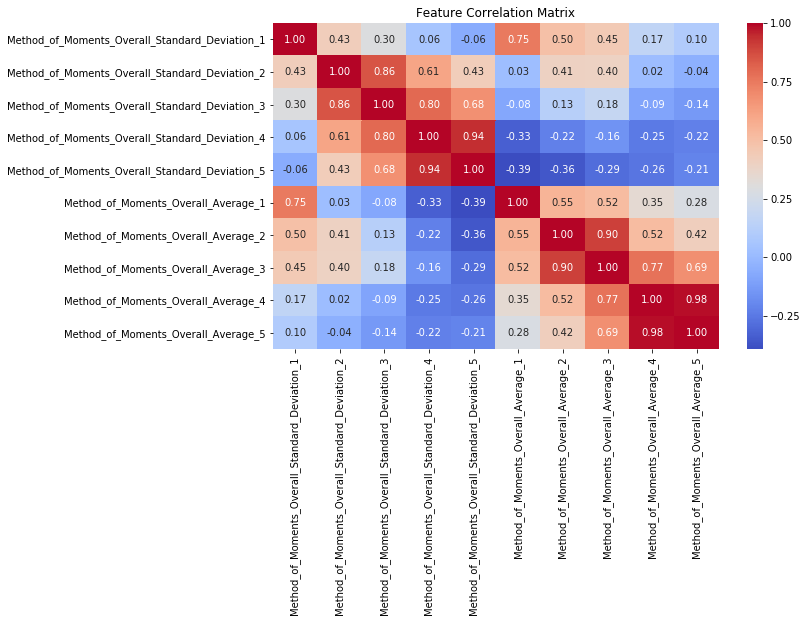

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
pandas_df = data.toPandas().drop(columns=['MSD_TRACKID'])
correlation_matrix = pandas_df.corr()
print(pandas_df.describe())
#Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

we can see that standard deviation 5 and 4, average 4 and 5, are strongly positive coorrelated

# b

In [7]:
genre_schema = StructType([
    StructField("track_id", StringType(), True),
    StructField("genre", StringType(), True)
])
genre = spark.read.csv('hdfs:///data//msd/genre/msd-MAGD-genreAssignment.tsv',
                            schema = genre_schema,
                            header = False,
                            sep = r"\t"
                            ).repartition(partitions)

genre.show()

genre_group = genre.groupBy(F.col('genre')).count()
genre_group.show(5)

+------------------+-------------+
|          track_id|        genre|
+------------------+-------------+
|TRZUBHV128F145528D|     Pop_Rock|
|TRUBVSI128F42A3328|        Latin|
|TRTZYQX128F92E0ED9|          RnB|
|TRYILJC128F149575E|      Country|
|TRWBVZM128F93131CE|     Pop_Rock|
|TRUKDUO128F4295F15|     Pop_Rock|
|TRTSWBU12903CE76DA|     Pop_Rock|
|TRXONWM12903CE65FC|     Pop_Rock|
|TRUKIRH128EF359C02|International|
|TRSZWAD128F92C3A11|     Pop_Rock|
|TRVGXUL128F92E87E6|     Pop_Rock|
|TRSZXKH12903CB61DE|International|
|TRZLYEB12903CC4C7F|   Electronic|
|TRVZLCS12903CC4CBC|      Country|
|TRUUQLA128F934B5DD|     Pop_Rock|
|TRXMVYL128F92EDEEC|     Pop_Rock|
|TRVMOET128F9318A74|     Pop_Rock|
|TRZIIRV128F931CA6E|     Pop_Rock|
|TRXHJWL12903CB1002|     Pop_Rock|
|TRWRCCW128F428843D|          Rap|
+------------------+-------------+
only showing top 20 rows

+----------+-----+
|     genre|count|
+----------+-----+
|  Children|  477|
|   New Age| 4010|
|   Holiday|  200|
|    Stage | 1614|
|

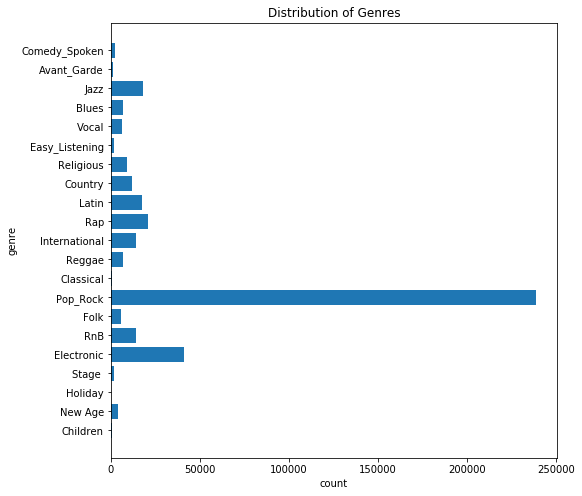

In [8]:
import matplotlib.pyplot as plt
genre_group_df = genre_group.toPandas()
plt.figure(figsize=(8, 8))
plt.barh(genre_group_df['genre'], genre_group_df['count'])
plt.xlabel('count')
plt.ylabel('genre')
plt.title("Distribution of Genres")
plt.show()

# (c)

In [9]:
data = data.withColumnRenamed("MSD_TRACKID", "track_id")
merge = genre.join(data, on = "track_id", how = "left")
merge.show()

+------------------+-------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+
|          track_id|        genre|Method_of_Moments_Overall_Standard_Deviation_1|Method_of_Moments_Overall_Standard_Deviation_2|Method_of_Moments_Overall_Standard_Deviation_3|Method_of_Moments_Overall_Standard_Deviation_4|Method_of_Moments_Overall_Standard_Deviation_5|Method_of_Moments_Overall_Average_1|Method_of_Moments_Overall_Average_2|Method_of_Moments_Overall_Average_3|Method_of_Moments_Overall_Average_4|Method_of_Moments_Overall_Average_5|
+------------------+-------------+----------------------------------------------+-------------------

# Q2 A

In [10]:
merge2 = merge.drop(F.col("Method_of_Moments_Overall_Average_4"))
merge2 = merge2.drop(F.col("Method_of_Moments_Overall_Standard_Deviation_4"))

step by step

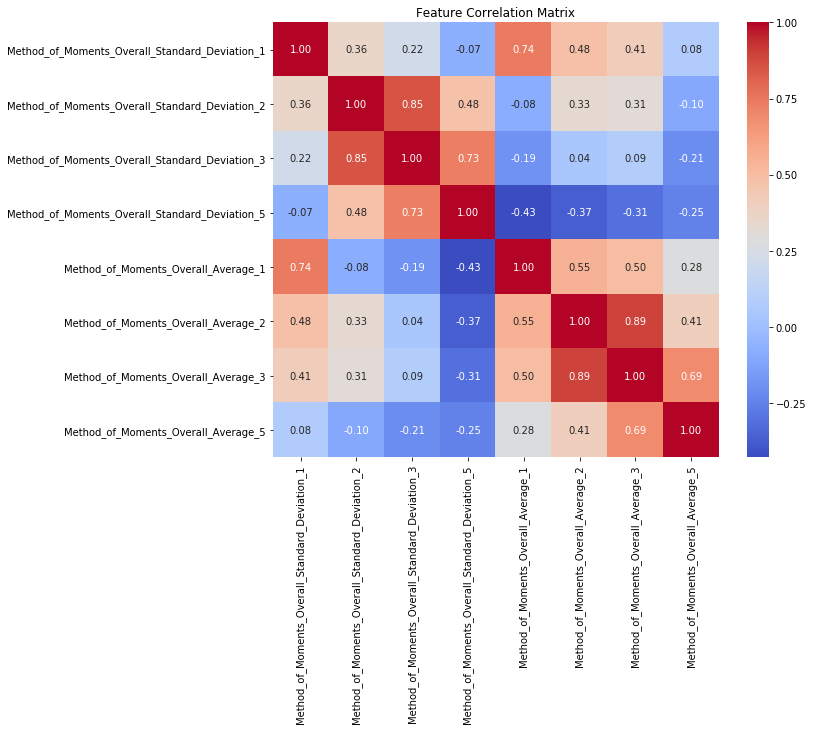

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
pandas_df = merge2.toPandas().drop(columns=['track_id'])
correlation_matrix = pandas_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# b

In [12]:
from pyspark.sql.functions import col, when
merge3 = merge2.withColumn("label", when(col("genre") == "Electronic", 1).otherwise(0))
merge3.show()
total = merge3.count()
count_1 = merge3.filter(col("label") == 1).count()
print(total)
print(count_1)
print(count_1/total)

+------------------+-------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----+
|          track_id|        genre|Method_of_Moments_Overall_Standard_Deviation_1|Method_of_Moments_Overall_Standard_Deviation_2|Method_of_Moments_Overall_Standard_Deviation_3|Method_of_Moments_Overall_Standard_Deviation_5|Method_of_Moments_Overall_Average_1|Method_of_Moments_Overall_Average_2|Method_of_Moments_Overall_Average_3|Method_of_Moments_Overall_Average_5|label|
+------------------+-------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+--------------------------------

422714
41075
0.09716971758683175


# c

In [13]:
def print_class_balance(dataset, dataset_name):
    class_counts = dataset.groupBy("label").count()
    class_ratios = class_counts.withColumn("ratio", class_counts["count"] / dataset.count())
    class_ratios.select("label", "count", "ratio").show()
    
#add id and random column for sampling
from pyspark.sql.window import Window
temp = (
    merge3
    .withColumn("id", F.monotonically_increasing_id())
    .withColumn("random", F.rand())
    .withColumn(
        "row",
        F.row_number()
        .over(
            Window
            .partitionBy("label")
            .orderBy("random")
        )
    )
)
print(total - count_1)

381639


In [14]:
#stratified random sampling
fractions = {
    0: 0.9028302824131682,
    1: 0.09716971758683175
}
stratified_sample = merge3.sampleBy("label", fractions=fractions, seed = 42)
print_class_balance(stratified_sample, "stratified_sample")

+-----+------+--------------------+
|label| count|               ratio|
+-----+------+--------------------+
|    0|344418|  0.9884117363454783|
|    1|  3934|0.011289804164657805|
+-----+------+--------------------+



In [15]:
#observation weighting
total_count = merge3.count()
count_label_0 = merge3.filter(F.col("label") == 0).count()
count_label_1 = merge3.filter(F.col("label") == 1).count()

weight_label_0 = total_count / count_label_0
weight_label_1 = total_count / count_label_1

weighted_data = temp.withColumn(
    "weight",
    F.when(F.col("label") == 0, weight_label_0).when(F.col("label") == 1, weight_label_1).otherwise(1.0)
)

weights = weighted_data.groupBy("label").agg(F.collect_set(F.col("weight")).alias("weights")).toPandas()
print(weights)
print_class_balance(weighted_data, "weighted_data")

   label               weights
0      0  [1.1076278891832334]
1      1  [10.291272063298843]
+-----+------+-------------------+
|label| count|              ratio|
+-----+------+-------------------+
|    0|381639| 0.9028302824131682|
|    1| 41075|0.09716971758683175|
+-----+------+-------------------+



# d

In [19]:
#split and preprocess
from pyspark.ml.feature import VectorAssembler
train_data, test_data = weighted_data.randomSplit([0.8, 0.2], seed = 42)
print_class_balance(train_data, "train_data")
print_class_balance(test_data, "test_data")
training = train_data
test = test_data
training = training.dropna()
feature_columns = [col for col in training.columns if col.startswith("Method_of_Moments_Overall")]
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
train_data = assembler.transform(training)
train_data.show()
test = test.dropna()
feature_columns = [col for col in test.columns if col.startswith("Method_of_Moments_Overall")]
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
test_data = assembler.transform(test)
test_data.show()

+-----+------+------------------+
|label| count|             ratio|
+-----+------+------------------+
|    0|305476|0.9029843687185187|
|    1| 32820|0.0970156312814813|
+-----+------+------------------+

+-----+-----+-------------------+
|label|count|              ratio|
+-----+-----+-------------------+
|    0|76163| 0.9022127982183894|
|    1| 8255|0.09778720178161056|
+-----+-----+-------------------+

+------------------+--------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----+------------+--------------------+------+------------------+--------------------+
|          track_id|         genre|Method_of_Moments_Overall_Standard_Deviation_1|Method_of_Moments_Overall_Standard_Deviation_2|Method

+------------------+-------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----+-------------+--------------------+------+------------------+--------------------+
|          track_id|        genre|Method_of_Moments_Overall_Standard_Deviation_1|Method_of_Moments_Overall_Standard_Deviation_2|Method_of_Moments_Overall_Standard_Deviation_3|Method_of_Moments_Overall_Standard_Deviation_5|Method_of_Moments_Overall_Average_1|Method_of_Moments_Overall_Average_2|Method_of_Moments_Overall_Average_3|Method_of_Moments_Overall_Average_5|label|           id|              random|   row|            weight|            features|
+------------------+-------------+----------------------------------------------+---------

In [22]:
#LogisticRegression
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

lr = LogisticRegression(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_data)
predictions_lr = lr_model.transform(test_data)
evaluator = BinaryClassificationEvaluator()

#RandomForest
rf = RandomForestClassifier(featuresCol='features', labelCol='label')
rf_model = rf.fit(train_data)
predictions_rf = rf_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')

#GBT
gbt = GBTClassifier(featuresCol='features', labelCol='label')
gbt_model = gbt.fit(train_data)
predictions_gbt = gbt_model.transform(test_data)

In [23]:
#metrics
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction')

precision_lr = evaluator.evaluate(predictions_lr, {evaluator.metricName: "weightedPrecision"})
accuracy_lr = evaluator.evaluate(predictions_lr, {evaluator.metricName: "accuracy"})
recall_lr = evaluator.evaluate(predictions_lr, {evaluator.metricName: "weightedRecall"})

precision_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "weightedPrecision"})
accuracy_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "accuracy"})
recall_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "weightedRecall"})

precision_gbt = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "weightedPrecision"})
accuracy_gbt = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "accuracy"})
recall_gbt = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "weightedRecall"})

print("Metrics for Logistic Regression:")
print("Precision:", precision_lr)
print("Accuracy:", accuracy_lr)
print("Recall:", recall_lr)
print("\n")

print("Metrics for Random Forest:")
print("Precision:", precision_rf)
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("\n")

print("Metrics for Gradient Boosting Tree:")
print("Precision:", precision_gbt)
print("Accuracy:", accuracy_gbt)
print("Recall:", recall_gbt)

Metrics for Logistic Regression:
Precision: 0.8666187234434759
Accuracy: 0.9028996725215838
Recall: 0.9028996725215838


Metrics for Random Forest:
Precision: 0.81501279270782
Accuracy: 0.9027805894611491
Recall: 0.9027805894611491


Metrics for Gradient Boosting Tree:
Precision: 0.8876736179606364
Accuracy: 0.9078535278356654
Recall: 0.9078535278356654


their performance are similar. Class imbalance occurs when one class significantly outnumbers other classes. In this case, the model may be biased towards the majority class, resulting in poor performance on the minority class.

# Q3A

In [26]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol='label', metricName="areaUnderROC")

# Logistic Regression
lr = LogisticRegression(featuresCol='features', labelCol='label', weightCol='weight')
paramGrid_lr = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.01])
             .addGrid(lr.elasticNetParam, [0.0, 1.0])
             .addGrid(lr.maxIter, [10])
             .build())
crossval_lr = CrossValidator(estimator=lr,
                             estimatorParamMaps=paramGrid_lr,
                             evaluator=evaluator,
                             numFolds=2)
cvModel_lr = crossval_lr.fit(train_data)
predictions_lr = cvModel_lr.transform(test_data)
accuracy_lr = evaluator.evaluate(predictions_lr)

# Random Forest
rf = RandomForestClassifier(featuresCol='features', labelCol='label', weightCol='weight')
paramGrid_rf = (ParamGridBuilder()
             .addGrid(rf.numTrees, [20, 50])
             .addGrid(rf.maxDepth, [5, 10])
             .build())
crossval_rf = CrossValidator(estimator=rf,
                             estimatorParamMaps=paramGrid_rf,
                             evaluator=evaluator,
                             numFolds=2)
cvModel_rf = crossval_rf.fit(train_data)
predictions_rf = cvModel_rf.transform(test_data)
accuracy_rf = evaluator.evaluate(predictions_rf)

# Gradient-Boosted Trees
gbt = GBTClassifier(featuresCol='features', labelCol='label', weightCol='weight')
paramGrid_gbt = (ParamGridBuilder()
             .addGrid(gbt.maxIter, [10, 20])
             .addGrid(gbt.maxDepth, [5, 10])
             .addGrid(gbt.stepSize, [0.1, 0.05])
             .build())
crossval_gbt = CrossValidator(estimator=gbt,
                             estimatorParamMaps=paramGrid_gbt,
                             evaluator=evaluator,
                             numFolds=2)
cvModel_gbt = crossval_gbt.fit(train_data)
predictions_gbt = cvModel_gbt.transform(test_data)
accuracy_gbt = evaluator.evaluate(predictions_gbt)

# Best Parameters
best_model_lr = cvModel_lr.bestModel
best_model_rf = cvModel_rf.bestModel
best_model_gbt = cvModel_gbt.bestModel
#extract
best_params_lr = {param.name: best_model_lr.getOrDefault(param) for param in paramGrid_lr[0]}
best_params_rf = {param.name: best_model_rf.getOrDefault(param) for param in paramGrid_rf[0]}
best_params_gbt = {param.name: best_model_gbt.getOrDefault(param) for param in paramGrid_gbt[0]}

print(f"Best Parameters for Logistic Regression: {best_params_lr}")
print(f"Logistic Regression - Area Under ROC: {accuracy_lr}")
print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Random Forest - Area Under ROC: {accuracy_rf}")
print(f"Best Parameters for Gradient-Boosted Trees: {best_params_gbt}")
print(f"Gradient-Boosted Trees - Area Under ROC: {accuracy_gbt}")

Best Parameters for Logistic Regression: {'regParam': 0.01, 'elasticNetParam': 0.0, 'maxIter': 10}
Logistic Regression - Area Under ROC: 0.7347777504090007
Best Parameters for Random Forest: {'numTrees': 50, 'maxDepth': 10}
Random Forest - Area Under ROC: 0.8107240920199889
Best Parameters for Gradient-Boosted Trees: {'maxIter': 20, 'maxDepth': 5, 'stepSize': 0.1}
Gradient-Boosted Trees - Area Under ROC: 0.805783320935736


# b

it provides a more reliable estimate of a model's performance on unseen data, gives each data point the opportunity to be part of both the training and validation sets, allowing more efficient use of limited data sets for model evaluation and tuning.

# c

Identify the key hyperparameters of the algorithm and, for each hyperparameter, choose an appropriate value range and interval. Make sure to cover a wide enough range to find the potential best value

The impact of hyperparameters may be not as big as that of the algorithm, so the impact may be less than 50%.

# 4QA

for logistic regression, there are two ways: OVR and softmax regression

# b

In [28]:
from pyspark.ml.feature import StringIndexer
#recreate a new multi classification table
merge3 = merge3.drop("label")
merge3 = merge3.drop("features")
feature_cols = [
        'Method_of_Moments_Overall_Standard_Deviation_1',
        'Method_of_Moments_Overall_Standard_Deviation_2',
        'Method_of_Moments_Overall_Standard_Deviation_3',
        'Method_of_Moments_Overall_Standard_Deviation_5',
        'Method_of_Moments_Overall_Average_1',
        'Method_of_Moments_Overall_Average_2',
        'Method_of_Moments_Overall_Average_5'
    ]

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features', handleInvalid="skip")
merge3 = assembler.transform(merge3)
merge3.show()

#create a multi label
stringIndexer = StringIndexer(inputCol="genre", outputCol="label", stringOrderType="frequencyDesc")
model = stringIndexer.fit(merge3)
genre_encoded = model.transform(merge3)
encoded_freq = genre_encoded.groupBy("label").count().sort("label")
encoded_freq.show(100)
genre_encoded.show()

+------------------+-------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+--------------------+
|          track_id|        genre|Method_of_Moments_Overall_Standard_Deviation_1|Method_of_Moments_Overall_Standard_Deviation_2|Method_of_Moments_Overall_Standard_Deviation_3|Method_of_Moments_Overall_Standard_Deviation_5|Method_of_Moments_Overall_Average_1|Method_of_Moments_Overall_Average_2|Method_of_Moments_Overall_Average_3|Method_of_Moments_Overall_Average_5|            features|
+------------------+-------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+--

+-----+------+
|label| count|
+-----+------+
|  0.0|237649|
|  1.0| 40666|
|  2.0| 20899|
|  3.0| 17775|
|  4.0| 17504|
|  5.0| 14314|
|  6.0| 14194|
|  7.0| 11691|
|  8.0|  8780|
|  9.0|  6931|
| 10.0|  6801|
| 11.0|  6182|
| 12.0|  5789|
| 13.0|  4000|
| 14.0|  2067|
| 15.0|  1613|
| 16.0|  1535|
| 17.0|  1012|
| 18.0|   555|
| 19.0|   463|
| 20.0|   200|
+-----+------+

+------------------+-------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+--------------------+-----+
|          track_id|        genre|Method_of_Moments_Overall_Standard_Deviation_1|Method_of_Moments_Overall_Standard_Deviation_2|Method_of_Moments_Overall_Standard_Deviation_3|Method_of_Moments_Overall_Standard_Deviation_5|Method_o

# c

In [40]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col
from functools import reduce
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

total_count = genre_encoded.count()
label_counts = genre_encoded.groupBy("label").count().collect()

#calculate weight
weights = {}
for row in label_counts:
    label = row['label']
    count = row['count']
    weights[label] = total_count / count

#add weight column
weighted_data = genre_encoded.withColumn(
    "weight",
    F.expr(f"CASE " + " ".join([f"WHEN label = {label} THEN {weight}" for label, weight in weights.items()]) + " ELSE 1.0 END")
)

#randomly split
multi_class = (
    weighted_data
    .withColumn("id", F.monotonically_increasing_id())
    .withColumn("random", F.rand())
    .withColumn(
        "row",
        F.row_number()
        .over(
            Window
            .partitionBy("label")
            .orderBy("random")
        )
    )
)

#create train and test dataset
training_multi_conditions = []
for row in label_counts:
    label = row['label']
    count = row['count']
    training_multi_conditions.append((col("label") == label) & (col("row") < count * 0.8))

training_multi = multi_class.where(reduce(lambda x, y: x | y, training_multi_conditions))
training_multi.cache()
test_multi = multi_class.join(training_multi, on="id", how="left_anti")
test_multi.cache()
training_multi = training_multi.drop("id", "random", "row")
test_multi = test_multi.drop("id", "random", "row")

print_class_balance(genre_encoded, "genre_encoded")
print_class_balance(training_multi, "training_multi")
print_class_balance(test_multi, "test_multi")

#define model and train
mlr = LogisticRegression(featuresCol='features', labelCol='label', weightCol='weight', maxIter=20, elasticNetParam=0, fitIntercept=True, family="multinomial")
mlrModel = mlr.fit(training_multi)
predictions = mlrModel.transform(test_multi)

#assess
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy = {accuracy}")

+-----+------+
|label|count |
+-----+------+
|0.0  |237649|
|1.0  |40666 |
|2.0  |20899 |
|3.0  |17775 |
|4.0  |17504 |
|5.0  |14314 |
|6.0  |14194 |
|7.0  |11691 |
|8.0  |8780  |
|9.0  |6931  |
|10.0 |6801  |
|11.0 |6182  |
|12.0 |5789  |
|13.0 |4000  |
|14.0 |2067  |
|15.0 |1613  |
|16.0 |1535  |
|17.0 |1012  |
|18.0 |555   |
|19.0 |463   |
+-----+------+
only showing top 20 rows

Class balance for genre_encoded:
+-----+------+
|label|count |
+-----+------+
|0.0  |190119|
|1.0  |32532 |
|2.0  |16719 |
|3.0  |14219 |
|4.0  |14003 |
|5.0  |11451 |
|6.0  |11355 |
|7.0  |9352  |
|8.0  |7023  |
|9.0  |5544  |
|10.0 |5440  |
|11.0 |4945  |
|12.0 |4631  |
|13.0 |3199  |
|14.0 |1653  |
|15.0 |1290  |
|16.0 |1227  |
|17.0 |809   |
|18.0 |443   |
|19.0 |370   |
+-----+------+
only showing top 20 rows

Class balance for training_multi:
+-----+-----+
|label|count|
+-----+-----+
|0.0  |47530|
|1.0  |8134 |
|2.0  |4180 |
|3.0  |3556 |
|4.0  |3501 |
|5.0  |2863 |
|6.0  |2839 |
|7.0  |2339 |
|8.0  |

# song recommadations

# a

In [44]:
tsv_data = spark.read \
    .option("inferSchema", "true") \
    .option("delimiter", "\t") \
    .csv("hdfs:///data/msd/tasteprofile/triplets.tsv")
tsv_data.show(5)

data = tsv_data.withColumnRenamed('_c0', 'user_id') \
           .withColumnRenamed('_c1', 'song_id') \
           .withColumnRenamed('_c2', 'play_count')

#repartition
num_partitions = 5
data = data.repartition(num_partitions)
data.cache()
data.show(5)

+--------------------+------------------+---+
|                 _c0|               _c1|_c2|
+--------------------+------------------+---+
|f1bfc2a4597a3642f...|SOQEFDN12AB017C52B|  1|
|f1bfc2a4597a3642f...|SOQOIUJ12A6701DAA7|  2|
|f1bfc2a4597a3642f...|SOQOKKD12A6701F92E|  4|
|f1bfc2a4597a3642f...|SOSDVHO12AB01882C7|  1|
|f1bfc2a4597a3642f...|SOSKICX12A6701F932|  1|
+--------------------+------------------+---+
only showing top 5 rows

+--------------------+------------------+----------+
|             user_id|           song_id|play_count|
+--------------------+------------------+----------+
|d7835e0b382743136...|SOFSWLA12A8C13B231|         1|
|7412bf693c402f5c3...|SOPUCYA12A8C13A694|         1|
|784e727a4dcb4299f...|SOCDQPS12A58A78C9D|         5|
|441401f6a0d7d27a6...|SOVORDN12AF72A4E66|         1|
|b3ea0cdc17c1f9c9f...|SOVJKGP12A8C13CF2E|         3|
+--------------------+------------------+----------+
only showing top 5 rows



# b

In [45]:
unique_songs = data.select(F.col("song_id")).distinct().count()
unique_users = data.select(F.col("user_id")).distinct().count()
print(unique_songs)
print(unique_users)

384546
1019318


# c

In [46]:
from pyspark.sql.functions import countDistinct

user_song_counts = data.groupBy('user_id').agg(countDistinct('song_id').alias('unique_song_count'))
most_active_user = user_song_counts.orderBy('unique_song_count', ascending=False).first()
most_active_user_id = most_active_user['user_id']
most_active_user_song_count = most_active_user['unique_song_count']
print(f"The number of different songs played by the most active user: {most_active_user_song_count}")
percentage = (most_active_user_song_count / unique_songs) * 100
print(f"Percentage of unique songs the most active user has played: {percentage:.2f}%")

The number of different songs played by the most active user: 4400
Percentage of unique songs the most active user has played: 1.14%


# d

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


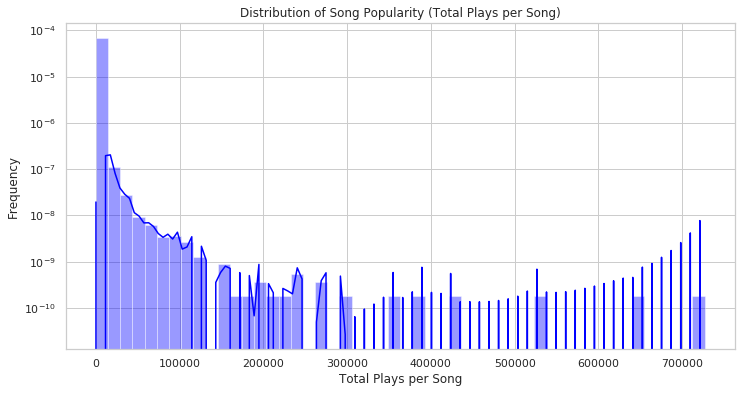

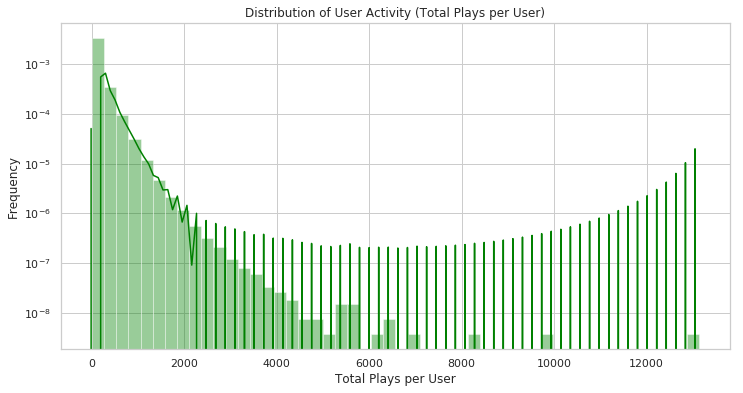

In [48]:
from pyspark.sql.functions import sum as _sum
import matplotlib.pyplot as plt
import seaborn as sns
#count the plays per song
song_play_counts = data.groupBy('song_id').agg(_sum('play_count').alias('total_plays'))
#count the plays per user
user_play_counts = data.groupBy('user_id').agg(_sum('play_count').alias('total_plays'))
song_play_counts_pd = song_play_counts.select('total_plays').toPandas()
user_play_counts_pd = user_play_counts.select('total_plays').toPandas()
#set plot style
sns.set(style="whitegrid")
#plot the distribution of song popularity
plt.figure(figsize=(12, 6))
sns.distplot(song_play_counts_pd['total_plays'], bins=50, kde=True, color='blue')
plt.title('Distribution of Song Popularity (Total Plays per Song)')
plt.xlabel('Total Plays per Song')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()
#plot the distribution of user activity
plt.figure(figsize=(12, 6))
sns.distplot(user_play_counts_pd['total_plays'], bins=50, kde=True, color='green')
plt.title('Distribution of User Activity (Total Plays per User)')
plt.xlabel('Total Plays per User')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# Q2a

In [55]:
#thresholds for filtering
N = 100
M = 80
#filter songs
popular_songs = song_play_counts.filter(F.col('total_plays') >= N).select('song_id')
data_filtered_songs = data.join(popular_songs, on='song_id', how='inner')
#filter users
active_users = user_play_counts.filter(F.col('total_plays') >= M).select('user_id')
clean_data = data_filtered_songs.join(active_users, on='user_id', how='inner')
clean_data.cache()
clean_data.show(5)
total_plays = clean_data.count()
print(total_plays)

+--------------------+------------------+----------+
|             user_id|           song_id|play_count|
+--------------------+------------------+----------+
|0010740acb42d4be6...|SOBFFMV12AB018ABA7|         1|
|0010740acb42d4be6...|SOQVTQG12AB018ABA9|         1|
|0010740acb42d4be6...|SOVWZRM12AB018AB9C|         1|
|0010740acb42d4be6...|SOUUGUK12AB0185137|         1|
|0010740acb42d4be6...|SOCDVGO12A58A7DB49|         3|
+--------------------+------------------+----------+
only showing top 5 rows

34748739


# b

In [56]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, row_number, floor, count
from pyspark.sql.window import Window

#fraction for splitting
train_fraction = 0.75
#repartition because the dataset is smaller
clean_data = clean_data.repartition(4, 'user_id')
#get the row number for each user's interactions
windowSpec = Window.partitionBy("user_id").orderBy("play_count")
clean_data = clean_data.withColumn("row_number", row_number().over(windowSpec))
#number of interactions per user
user_interaction_counts = clean_data.groupBy("user_id").count().withColumnRenamed("count", "interaction_count")
clean_data = clean_data.alias("clean_data").join(
    user_interaction_counts.alias("user_interaction_counts"),
    col("clean_data.user_id") == col("user_interaction_counts.user_id"),
    "inner"
).select(
    col("clean_data.user_id"),
    col("clean_data.song_id"),
    col("clean_data.play_count"),
    col("clean_data.row_number"),
    col("user_interaction_counts.interaction_count")
)
#calculate the split point
clean_data = clean_data.withColumn("split_point", (floor(col("interaction_count") * train_fraction) + 1).cast("integer"))
#split into training set
train_data = clean_data.filter(col("row_number") <= col("split_point")).drop("row_number", "interaction_count", "split_point")
test_data = clean_data.filter(col("row_number") > col("split_point")).drop("row_number", "interaction_count", "split_point")
#calculate the total plays and the required test plays
total_plays = clean_data.count()
train_plays = train_data.count()
test_plays = test_data.count()
#check
if test_plays / total_plays < 0.25:
    additional_test_plays_needed = int(0.25 * total_plays) - test_plays
    additional_test_data = train_data.sample(False, additional_test_plays_needed / train_plays, seed=42)
    train_data = train_data.subtract(additional_test_data)
    test_data = test_data.union(additional_test_data)
#verify the split
test_plays = test_data.count()
train_plays = train_data.count()

print(f"Total plays: {total_plays}")
print(f"Training plays: {train_plays}")
print(f"Test plays: {test_plays}")
#check
assert test_plays / total_plays >= 0.25, "Test set does not contain at least 25% of the plays."
test_users = test_data.select('user_id').distinct()
train_users = train_data.select('user_id').distinct()
assert test_users.subtract(train_users).count() == 0, "Some test users have no interactions in the training set."

Total plays: 34748739
Training plays: 26060693
Test plays: 8688046


# c

In [57]:
from pyspark.sql.functions import col, monotonically_increasing_id
#create unique integer IDs for user_id
user_mapping = train_data.select('user_id').distinct().withColumn('user_index', monotonically_increasing_id())
song_mapping = train_data.select('song_id').distinct().withColumn('song_index', monotonically_increasing_id())
#ensure indices are within integer range and are integer type
user_mapping = user_mapping.withColumn('user_index', col('user_index').cast('int'))
song_mapping = song_mapping.withColumn('song_index', col('song_index').cast('int'))
train_data = train_data.join(user_mapping, on='user_id', how='left') \
                       .join(song_mapping, on='song_id', how='left')
test_data = test_data.join(user_mapping, on='user_id', how='left') \
                     .join(song_mapping, on='song_id', how='left')

train_data = train_data.select('user_index', 'song_index', 'play_count')
test_data = test_data.select('user_index', 'song_index', 'play_count')
train_data.show()
test_data.show()

#drop rows with null values in train_data and test_data
train_data = train_data.dropna(subset=['user_index', 'song_index'])
test_data = test_data.dropna(subset=['user_index', 'song_index'])
#verify
train_data.filter(train_data.user_index.isNull() | train_data.song_index.isNull()).show()
test_data.filter(test_data.user_index.isNull() | test_data.song_index.isNull()).show()

+----------+----------+----------+
|user_index|song_index|play_count|
+----------+----------+----------+
|       496|       305|         1|
|      1499|       305|         1|
|      1571|       305|         1|
|      1087|       305|         1|
|      1772|       305|         1|
|      3299|       305|         2|
|       600|       305|         1|
|       827|       305|         1|
|      1068|       305|         1|
|      1902|       305|         2|
|      1971|       305|         1|
|       500|       305|         1|
|      1129|       305|         1|
|      1591|       305|         1|
|      2058|       305|         1|
|      2203|       305|         1|
|      1890|       305|         2|
|      2195|       305|         1|
|      2794|       305|         1|
|      1669|       305|         1|
+----------+----------+----------+
only showing top 20 rows

+----------+----------+----------+
|user_index|song_index|play_count|
+----------+----------+----------+
|      2141|       342|      

In [58]:
from pyspark.ml.recommendation import ALS
#initialize
als = ALS(
    userCol='user_index',
    itemCol='song_index',
    ratingCol='play_count',
    implicitPrefs=True,  #treat the play counts as implicit feedback
    rank=10,
    maxIter=10,
    regParam=0.1,
    alpha=1.0,
    coldStartStrategy='drop'
)

als_model = als.fit(train_data)
predictions = als_model.transform(test_data)
#evaluate
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
    metricName='rmse',
    labelCol='play_count',
    predictionCol='prediction'
)
rmse = evaluator.evaluate(predictions)
print(f'Root-mean-square error = {rmse}')

Root-mean-square error = 14.821217739907688


# d

In [59]:
from pyspark.sql.functions import col
#select 5 users
sample_users = test_data.select('user_index').distinct().limit(5).collect()
sample_user_ids = [row['user_index'] for row in sample_users]
#generate recommendations
user_subset = test_data.filter(col('user_index').isin(sample_user_ids))
recommendations = als_model.recommendForUserSubset(user_subset, 10)
recommendations.show(truncate=False)
#compare recommendations with actual plays
for user_id in sample_user_ids:
    print(f"Recommendations for user {user_id}:")
    user_recommendations = recommendations.filter(col('user_index') == user_id).collect()
    if user_recommendations:
        recommended_songs = [row['song_index'] for row in user_recommendations[0]['recommendations']]
        print(f"Recommended songs: {recommended_songs}")
    
    actual_plays = test_data.filter(col('user_index') == user_id).select('song_index').collect()
    actual_played_songs = [row['song_index'] for row in actual_plays]
    print(f"Actual played songs: {actual_played_songs}")
    print("----")

+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|user_index|recommendations                                                                                                                                                           |
+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|739       |[{35, 1.532746}, {39, 1.5311891}, {21, 1.5237336}, {19, 1.5230632}, {58, 1.521319}, {65, 1.5204055}, {79, 1.5185388}, {72, 1.5180793}, {94, 1.5153729}, {93, 1.5148623}]  |
|1397      |[{35, 1.502583}, {39, 1.5010569}, {21, 1.4937482}, {19, 1.4930909}, {58, 1.491381}, {65, 1.4904855}, {79, 1.4886556}, {72, 1.4882052}, {94, 1.4855518}, {93, 1.4850512}]  |
|1768      |[{35, 1.5121917}, {39, 1.5106558}, {21, 1.5033002}, {19, 1.5026385},

Recommended songs: [35, 39, 21, 19, 58, 65, 79, 72, 94, 93]
Actual played songs: [189, 224, 389, 62, 44, 223, 266, 78, 23, 0, 450, 324, 47, 14, 197, 366, 27, 27, 671, 262, 772, 710, 425, 309, 79, 8, 308, 144, 310, 115, 316, 236, 12, 12, 17, 57, 717, 232, 60, 517, 450, 22, 172, 207, 26, 796, 27, 64, 223, 0, 233, 847, 141, 538, 3, 86, 424, 132, 726, 401, 27, 116, 93, 186, 166, 115, 38, 570, 355, 487, 461, 406, 356, 686, 10, 190, 190, 267, 111, 20, 34, 34, 4, 226, 111, 29, 73, 30, 209, 6, 6, 11, 574, 681, 126, 30, 83, 396, 188, 60, 47, 399, 21, 87, 147, 200, 47, 126, 556, 0, 0, 0, 516, 145, 68, 11, 10, 111, 532, 622, 8, 8, 21, 21, 158, 472, 4, 195, 139, 273, 30, 32, 55, 718, 268, 100, 18, 31, 105, 44, 532, 44, 164, 86, 102, 79, 696, 9, 52, 213, 135, 61, 251, 290, 0, 0, 69, 580, 189, 120, 146, 418, 96, 301, 143, 143, 219, 84, 149, 537, 26, 456, 587, 425, 885, 493, 3, 57, 114, 107, 107, 9, 9, 168, 56, 766, 392, 0, 101, 189, 428, 59, 59, 17, 17, 17, 17, 238, 389, 277, 532, 177, 683, 41, 41, 

Recommended songs: [35, 39, 21, 19, 58, 65, 79, 72, 94, 93]
Actual played songs: [124, 112, 823, 588, 270, 26, 46, 489, 75, 180, 283, 118, 564, 114, 341, 76, 96, 20, 133, 14, 89, 24, 25, 121, 189, 292, 291, 4, 26, 448, 266, 465, 84, 102, 49, 12, 12, 57, 31, 9, 720, 103, 112, 432, 367, 367, 6, 6, 3, 440, 370, 11, 450, 52, 52, 79, 19, 51, 642, 26, 26, 26, 26, 22, 22, 230, 349, 289, 115, 115, 56, 163, 127, 400, 360, 134, 150, 207, 11, 67, 267, 94, 402, 368, 146, 228, 33, 89, 120, 47, 61, 61, 102, 365, 31, 227, 25, 104, 61, 31, 155, 11, 140, 107, 487, 229, 222, 81, 1, 5, 56, 14, 410, 59, 18, 528, 47, 55, 702, 208, 117, 436, 177, 838, 632, 800, 113, 68, 166, 46, 48, 612, 54, 6, 0, 33, 526, 19, 552, 144, 12, 13, 13, 94, 153, 66, 64, 233, 87, 104, 169, 280, 58, 32, 32, 43, 5, 25, 478, 48, 96, 330, 35, 80, 78, 0, 0, 0, 564, 439, 90, 90, 86, 615, 13, 566, 332, 108, 51, 100, 249, 1, 1, 1, 1, 1, 94, 60, 147, 25, 476, 476, 92, 400, 51, 370, 481, 67, 5, 5, 555, 511, 838, 142, 415, 1, 1, 1, 227, 143

Recommended songs: [35, 39, 21, 19, 58, 65, 79, 72, 94, 93]
Actual played songs: [616, 585, 241, 6, 228, 506, 198, 30, 44, 50, 29, 124, 15, 7, 602, 381, 33, 461, 472, 28, 40, 476, 592, 599, 416, 9, 729, 42, 86, 880, 281, 400, 75, 115, 45, 45, 276, 276, 19, 22, 22, 22, 78, 237, 117, 34, 473, 158, 242, 880, 8, 263, 521, 1, 307, 68, 68, 85, 282, 57, 9, 485, 18, 49, 360, 382, 55, 732, 12, 212, 325, 102, 38, 290, 79, 85, 96, 422, 179, 296, 23, 321, 341, 76, 33, 480, 174, 5, 238, 12, 10, 7, 432, 184, 8, 31, 199, 166, 10, 10, 19, 520, 104, 173, 107, 681, 22, 3, 232, 228, 52, 49, 57, 174, 199, 49, 897, 34, 20, 365, 69, 156, 51, 534, 88, 217, 58, 12, 100, 9, 460, 17, 141, 52, 1, 0, 42, 292, 431, 187, 303, 295, 5, 4, 4, 16, 629, 137, 137, 332, 37, 37, 37, 9, 72, 676, 0, 555, 22, 183, 8, 25, 53, 53, 379, 293, 198, 183, 119, 104, 548, 81, 831, 90, 100, 25, 65, 291, 10, 13, 57, 15, 15, 15, 21, 21, 63, 42, 853, 186, 580, 836, 640, 154, 567, 460, 252, 0, 138, 852, 104, 582, 104, 10, 125, 329, 63, 89,

Recommended songs: [35, 39, 21, 19, 58, 65, 79, 72, 94, 93]
Actual played songs: [49, 171, 146, 149, 258, 111, 393, 6, 26, 26, 465, 795, 348, 268, 215, 435, 111, 11, 11, 56, 30, 51, 102, 125, 312, 14, 711, 69, 297, 43, 3, 36, 36, 838, 45, 43, 456, 42, 154, 24, 116, 92, 128, 4, 34, 1, 12, 109, 147, 94, 299, 101, 38, 314, 58, 306, 2, 183, 182, 132, 271, 23, 95, 590, 811, 4, 4, 4, 77, 88, 118, 132, 7, 405, 53, 29, 32, 154, 137, 59, 15, 15, 60, 127, 61, 191, 311, 89, 89, 59, 4, 81, 178, 298, 57, 17, 78, 564, 138, 12, 151, 64, 120, 120, 705, 15, 32, 3, 3, 3, 889, 144, 141, 105, 169, 11, 209, 6, 20, 590, 248, 25, 62, 133, 204, 5, 91, 122, 178, 66, 151, 4, 4, 8, 50, 330, 129, 368, 163, 261, 16, 510, 140, 11, 11, 521, 172, 125, 75, 68, 8, 279, 66, 215, 55, 518, 112, 118, 146, 64, 37, 37, 9, 79, 304, 0, 54, 46, 6, 104, 151, 127, 145, 267, 144, 476, 317, 158, 377, 302, 100, 242, 169, 87, 296, 57, 563, 644, 450, 193, 107, 107, 160, 160, 18, 66, 709, 444, 13, 137, 92, 14, 183, 458, 603, 384, 96, 2

In [61]:
#define ALS model with fewer latent factors
als = ALS(userCol='user_index', itemCol='song_index', ratingCol='play_count', coldStartStrategy='drop', nonnegative=True)
evaluator = RegressionEvaluator(metricName='rmse', labelCol='play_count', predictionCol='prediction')
#define parameter grid with lower rank values
paramGrid = ParamGridBuilder() \
    .addGrid(als.rank, [5, 10, 15]) \
    .addGrid(als.regParam, [0.01, 0.1]) \
    .addGrid(als.maxIter, [5, 10]) \
    .build()
crossval = CrossValidator(estimator=als, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=2)
cvModel = crossval.fit(train_data)
best_model = cvModel.bestModel
print("Best Rank:", best_model._java_obj.parent().getRank())
print("Best RegParam:", best_model._java_obj.parent().getRegParam())
print("Best MaxIter:", best_model._java_obj.parent().getMaxIter())

Best Rank: 10
Best RegParam: 0.1
Best MaxIter: 5


In [62]:
sample_user_ids = [1234,4231, 1243]
user_subset = test_data.filter(col('user_index').isin(sample_user_ids))
recommendations = best_model.recommendForUserSubset(user_subset, 10)
recommendations.show(truncate=False)
#compare 
for user_id in sample_user_ids:
    print(f"Recommendations for user {user_id}:")
    user_recommendations = recommendations.filter(col('user_index') == user_id).collect()
    if user_recommendations:
        recommended_songs = [row['song_index'] for row in user_recommendations[0]['recommendations']]
        print(f"Recommended songs: {recommended_songs}")
    
    actual_plays = test_data.filter(col('user_index') == user_id).select('song_index').collect()
    actual_played_songs = [row['song_index'] for row in actual_plays]
    print(f"Actual played songs: {actual_played_songs}")
    print("----")

+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|user_index|recommendations                                                                                                                                                                    |
+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|1243      |[{980, 3.3413863}, {977, 2.7962847}, {969, 2.295633}, {954, 2.2915745}, {966, 2.2871954}, {930, 2.2806554}, {934, 2.0641155}, {911, 2.0249476}, {927, 2.0149913}, {962, 2.0127776}]|
|1234      |[{980, 3.2450342}, {977, 2.715645}, {969, 2.2294374}, {954, 2.2255013}, {966, 2.2212424}, {930, 2.2156394}, {934, 2.0045946}, {911, 1.9656702}, {927, 1.956884}, {962, 1.9547462}] |
+----------+-----------------------

Actual played songs: []
----
Recommendations for user 1243:
Recommended songs: [980, 977, 969, 954, 966, 930, 934, 911, 927, 962]
Actual played songs: [58, 14, 14, 73, 107, 377, 28, 536, 35, 26, 552, 0, 0, 0, 0, 0, 206, 305, 19, 273, 67, 535, 158, 186, 121, 10, 192, 611, 63, 346, 33, 69, 68, 448, 203, 283, 351, 241, 1, 1, 8, 390, 31, 231, 123, 34, 69, 169, 61, 4, 41, 263, 269, 197, 15, 201, 54, 14, 92, 52, 375, 22, 3, 3, 11, 72, 742, 46, 682, 85, 168, 36, 9, 5, 417, 33, 117, 548, 40, 281, 77, 43, 14, 24, 24, 29, 69, 274, 361, 170, 111, 80, 353, 50, 163, 136, 1, 58, 41, 282, 40, 40, 31, 6, 6, 6, 37, 226, 49, 339, 65, 259, 165, 39, 91, 148, 19, 267, 20, 82, 222, 415, 90, 458, 28, 37, 439, 104, 157, 92, 125, 203, 203, 121, 690, 159, 65, 133, 90, 396, 274, 4, 97, 158, 13, 13, 124, 100, 367, 334, 54, 450, 17, 299, 129, 423, 74, 1, 528, 115, 70, 14, 605, 198, 198, 354, 220, 95, 364, 569, 579, 470, 12, 12, 18, 78, 78, 53, 157, 81, 24, 546, 44, 30, 272, 175, 156, 198, 76, 332, 5, 167, 17, 9, 4

# e

In [63]:
from pyspark.sql.functions import col, collect_list, expr
from pyspark.ml.evaluation import RankingEvaluator
#generate
user_subset = test_data.select('user_index').distinct()
predictions = best_model.recommendForUserSubset(user_subset, 10)
#convert the recommended songs to an array of doubles
predictions = predictions.withColumn("predicted_songs", expr("transform(recommendations, x -> cast(x.song_index as double))"))
#ctual played songs for evaluation
actual_played = test_data.groupBy("user_index").agg(collect_list(col("song_index").cast("double")).alias("actual_played"))
#join the predictions with the actual played songs
evaluation_data = predictions.join(actual_played, on="user_index")
#evaluators
precision_evaluator = RankingEvaluator(predictionCol="predicted_songs", labelCol="actual_played", metricName="precisionAtK", k=10)
ndcg_evaluator = RankingEvaluator(predictionCol="predicted_songs", labelCol="actual_played", metricName="ndcgAtK", k=10)
map_evaluator = RankingEvaluator(predictionCol="predicted_songs", labelCol="actual_played", metricName="meanAveragePrecisionAtK", k=10)
#evaluate
precision_at_10 = precision_evaluator.evaluate(evaluation_data)
ndcg_at_10 = ndcg_evaluator.evaluate(evaluation_data)
map_score = map_evaluator.evaluate(evaluation_data)
# Print the evaluation metrics
print(f'Precision@10 = {precision_at_10}')
print(f'NDCG@10 = {ndcg_at_10}')
print(f'MAP = {map_score}')

Precision@10 = 0.011311053984575837
NDCG@10 = 0.008573992036649766
MAP = 0.0018575407026563842


In [11]:
# Run this cell before closing the notebook or kill your spark application by hand using the link in the Spark UI

stop_spark()